# Predicting Enron Spam Emails using Supervised Learning

## DS-GA 1001: Introduction to Data Science Final Project

### Scripts

## Models with a Small Sample

----

## Logstic Regression with Elastic Net (baseline)

## Random Forest

## Gradient Boosting Machine

## Multilayer Perceptron

## Multinomial Naive Bayes

Created On: 12/04/2020

Modified On: 12/04/2020

### Description

This script contains various models for a random sample of the `emails_cleaned.csv` dataset. For detail descriptions, please refer to the "research design" section of the final report.

### Data

We applied random sampling to create a small subset of the original dataset. We also applied feature engineering to make the data ready for models.

The sampled data will be used to train models. The rest data will be used as hold-out data. After trained the model, we applied them to the hold-out data to evaluate model performance. 

In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

print("SUCCESS! All modules have been imported.")

SUCCESS! All modules have been imported.


In [2]:
df_origin = pd.read_csv('../data/emails_cleaned.csv')

In [3]:
# Remove rows containing missing values
df_origin.dropna(subset=['X'], inplace=True)
# Confirm that there is no missing values
df_origin.isnull().sum()

X    0
y    0
dtype: int64

In [4]:
df = df_origin.sample(frac=0.05, replace=False, random_state=88)

In [32]:
print('The model-ready dataset contains {} rows.'.format(df.shape[0]))

The model-ready dataset contains 39279 rows.


### Feature Engineering

We applied [Term frequency–inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) (TF-IDF) method to transform string email contents into meaningful numeric figures so that they can be applied for model training.

#### TF-IDF

In [8]:
# Create a vectorization matrix using tf-idf vectorizer
vectorizer = TfidfVectorizer()
vectorized_emails = vectorizer.fit_transform(df.X)
vectorized_emails

<39279x32796 sparse matrix of type '<class 'numpy.float64'>'
	with 217837 stored elements in Compressed Sparse Row format>

### Methods

#### Train Test Split

Before fitting the model, we splitted the dataset into two parts: train set and test set. We used train set to train models and used test set to examine the performance of each model.

In [9]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(vectorized_emails, df.y, test_size=test_size, random_state=88)

#### Cross Validation

We applied cross validation to improve model performance.

#### Grid and Randomized Search

We also applied grid search and randomized search with to tune the hyperparameters. The goal is to find the optimal hyperparameter `C` so that our model will reach the optimal complexity.

----

### Logstic Regression with Elastic Net (Baseline)

We used logistic regression as our baseline model. We also applied elastic net to weight coefficients and added a penalty term to our model. 

##### Elastic Net

We first applied grid search on the parameter of the elastic net, `l1 ratio`. We created a hyperparameter space that contains 30 possible l1 ratio values. We then fitted the training data with 5-fold cross validation to get the best l1 ratio. 

In [20]:
# Setup a hyperparameter grid for l1_ratio that is from 0 to 1
l1_space = [0.2, 0.5, 0.8]
param_grid = {'l1_ratio': l1_space}

In [22]:
elastic_net = ElasticNet()

In [23]:
# Setup the grid search and fit the training data
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5, n_jobs=-1)
gm_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'l1_ratio': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [24]:
# Predict on the test dataset and compute metrics
y_pred = gm_cv.predict(X_test)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))

Tuned ElasticNet l1 ratio: {'l1_ratio': 1e-05}


#### Regularization Strength

We also considered tuning the regularization parameter, `C`. A large `C` leads to overfit while a small `C` can get to underfit. In this case, we set the parameter to 1.

In [10]:
# Setup a hyperparameter grid for C that is from 0 to 1
c_space = np.logspace(-2, 2, 5)
param_grid = {'C': c_space}

In [11]:
# Fit a logistic regression model with elastic net and built-in cross validation
logreg = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.00001, max_iter=5000, verbose=0.05)

In [12]:
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')
logreg_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 22 epochs took 44 seconds
rescaling...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 22 epochs took 45 seconds
rescaling...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 22 epochs took 44 seconds
rescaling...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 23 epochs took 46 seconds
rescaling...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 21 epochs took 42 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 22 epochs took 43 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 20 epochs took 40 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 23 epochs took 46 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 24 epochs took 48 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 22 epochs took 44 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 23 epochs took 45 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 24 epochs took 48 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   47.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 23 epochs took 46 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 25 epochs took 51 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 25 epochs took 50 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 62 epochs took 124 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 64 epochs took 129 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 64 epochs took 131 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 64 epochs took 131 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 61 epochs took 125 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 281 epochs took 577 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 281 epochs took 585 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 276 epochs took 566 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 291 epochs took 598 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 10.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 294 epochs took 602 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 10.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 63 epochs took 182 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(l1_ratio=1e-05, max_iter=5000,
                                          penalty='elasticnet', solver='saga',
                                          verbose=0.05),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='roc_auc')

In [13]:
best_param_logreg = logreg_cv.best_params_
validation_auc_logreg = logreg_cv.best_score_

# Predict on the test data
y_pred_prob = logreg_cv.predict_proba(X_test)[:, 1]
test_auc_logreg = roc_auc_score(y_test, y_pred_prob)
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_prob)

In [14]:
logreg_cv.best_estimator_

LogisticRegression(C=10.0, l1_ratio=1e-05, max_iter=5000, penalty='elasticnet',
                   solver='saga', verbose=0.05)

In [16]:
print('Tuned Logstic Regression with Elastic Net Paramters: {}'.format(best_param_logreg))
print('Tuned Logstic Regression with Elastic Net Validation AUC: {}'.format(validation_auc_logreg))
print('Tuned Logstic Regression Test AUC: {}'.format(test_auc_logreg))

Tuned Logstic Regression with Elastic Net Paramters: {'C': 10.0}
Tuned Logstic Regression with Elastic Net Validation AUC: 0.9240338021050224
Tuned Logstic Regression Test AUC: 0.9263978647063086


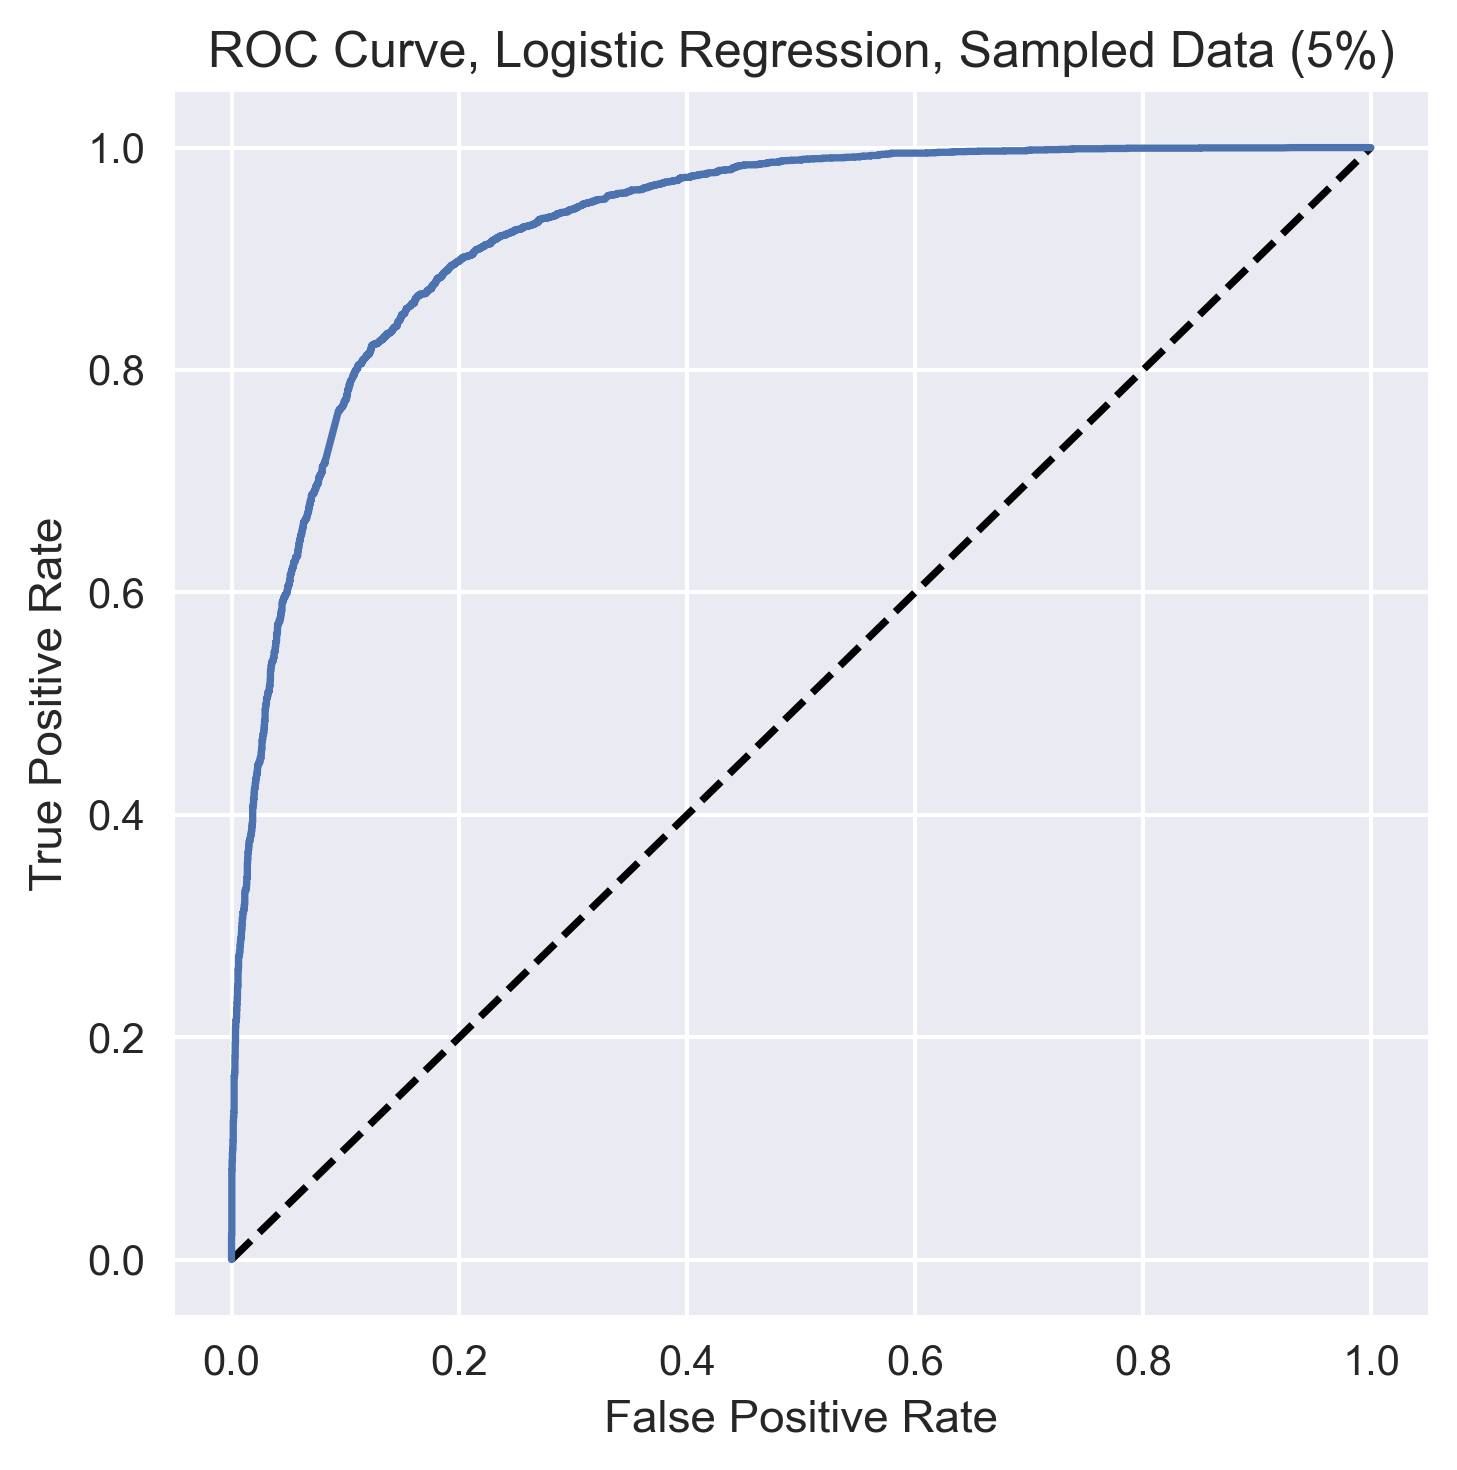

In [61]:
plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logreg, tpr_logreg)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, Logistic Regression, Sampled Data (5%)')
plt.show()
fig.savefig('../results/roc_curve_logistic_regression_sample.png', dpi=fig.dpi)

----

### Random Forest

In [43]:
# Setup a hyperparameter grid for random forest
n_estimators = [50, 100, 200, 500]
max_depth = [10, 50, 100, 200]
min_samples_leaf = [10, 20, 50, 100]
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}

In [44]:
rf = RandomForestClassifier(criterion='entropy', random_state=88, verbose=0.5)

In [45]:
rf_cv = RandomizedSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
rf_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   31.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   35.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   31.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Us

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=88,
                                                    verbose=0.5),
                   param_distributions={'max_depth': [10, 50, 100, 200],
                                        'min_samples_leaf': [10, 20, 50, 100],
                                        'n_estimators': [50, 100, 200, 500]},
                   scoring='roc_auc')

In [46]:
best_param_rf = rf_cv.best_params_
validation_auc_rf = rf_cv.best_score_

# Predict on the test data
y_pred_prob = rf_cv.predict_proba(X_test)[:, 1]
test_auc_rf = roc_auc_score(y_test, y_pred_prob)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.9s finished


In [47]:
rf_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=200, min_samples_leaf=10,
                       n_estimators=500, random_state=88, verbose=0.5)

In [49]:
print('Tuned Random Forest Parameters: {}'.format(best_param_rf))
print('Tuned Random Forest Validation AUC: {}'.format(validation_auc_rf))
print('Tuned Random Forest Test AUC: {}'.format(test_auc_rf))

Tuned Random Forest Parameters: {'n_estimators': 500, 'min_samples_leaf': 10, 'max_depth': 200}
Tuned Random Forest Validation AUC: 0.8684352028054348
Tuned Random Forest Test AUC: 0.869883281345001


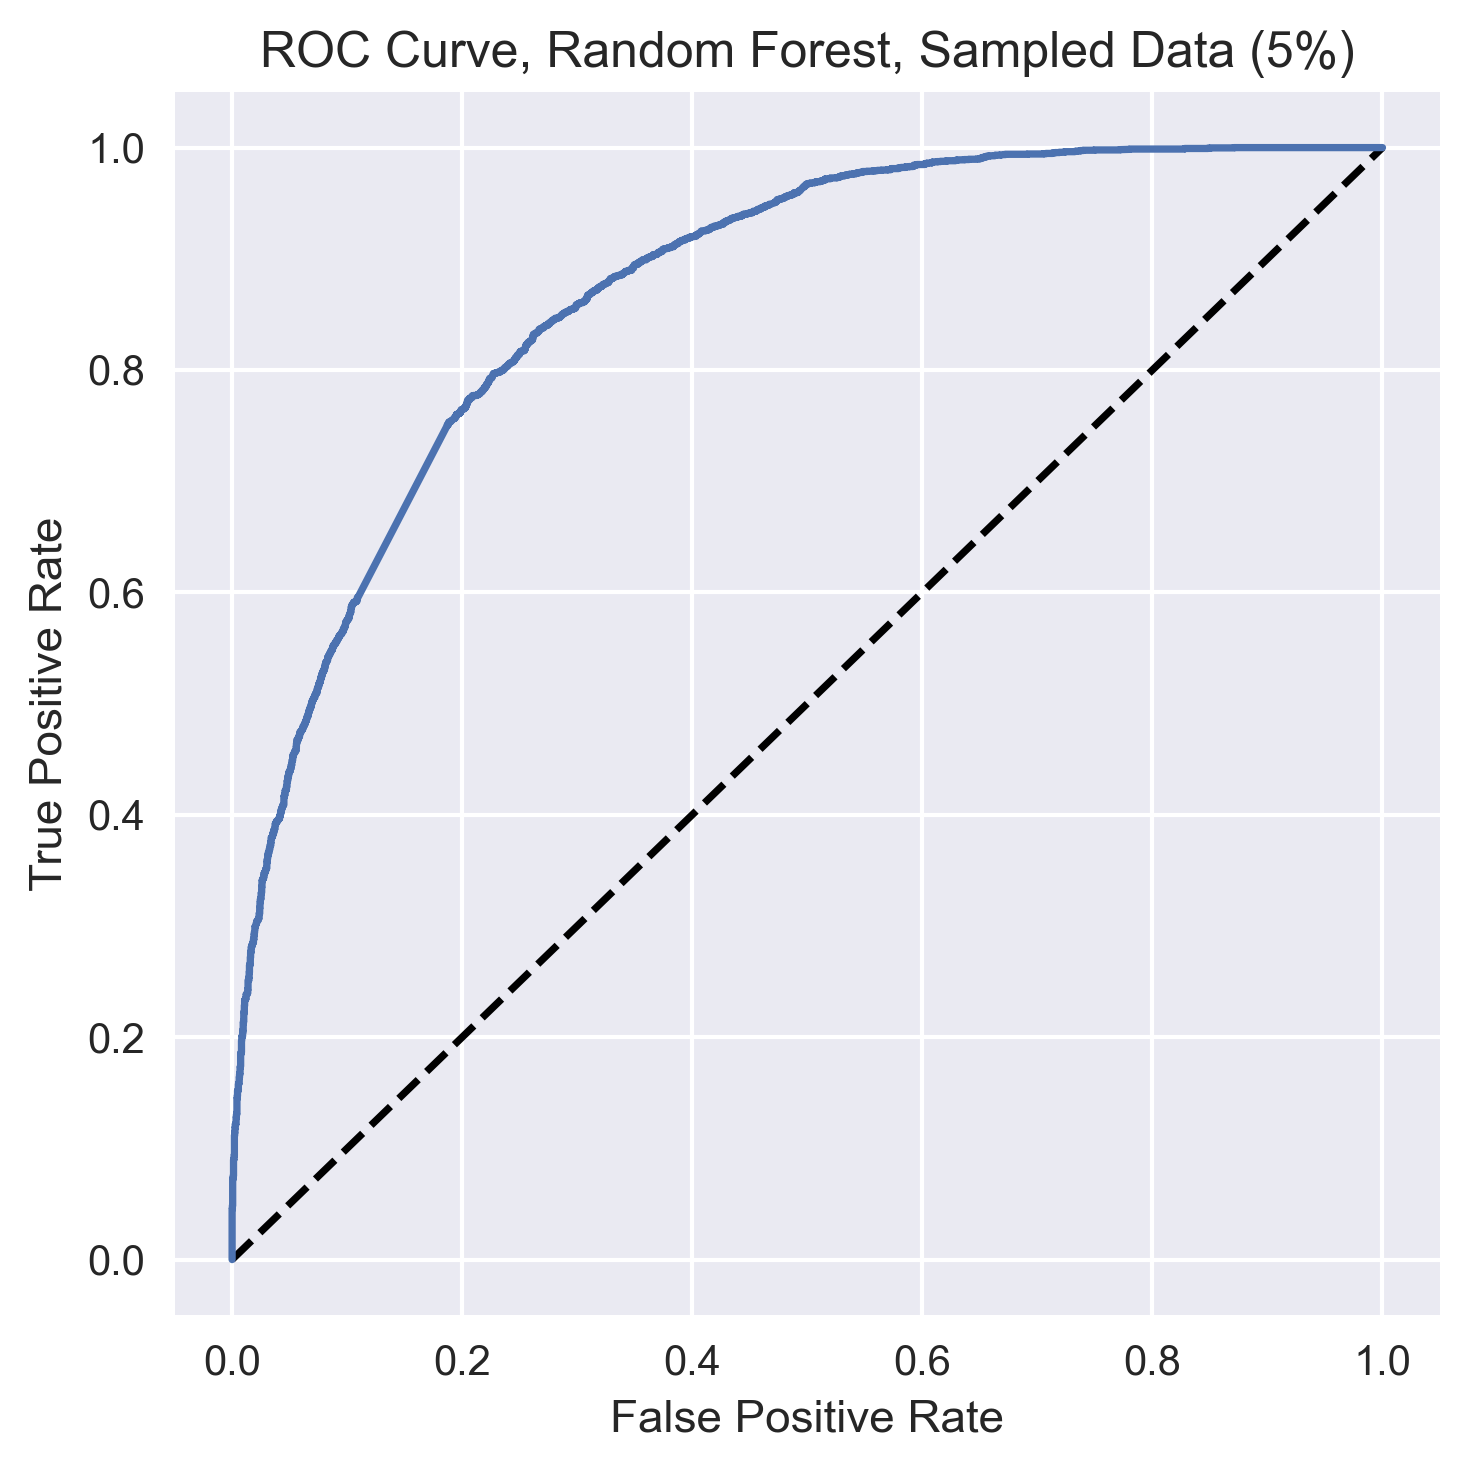

In [60]:
plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, Random Forest, Sampled Data (5%)')
plt.show()
fig.savefig('../results/roc_curve_random_forest_sample.png', dpi=fig.dpi)

----

### Gradient Boosting Machine

In [58]:
# Setup a hyperparameter grid for gradient boosting machine
n_estimators = [100, 300]
max_depth = [50]
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}

In [59]:
gboost = GradientBoostingClassifier(verbose=0.1)

In [63]:
gboost_cv = GridSearchCV(gboost, param_grid, cv=5, scoring='roc_auc')
gboost_cv.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3374            2.80m
         2           1.2971            2.85m
         3           1.2644            2.78m
         4           1.2333            2.81m
         5           1.2079            2.83m
         6           1.1840            2.87m
         7           1.1623            2.87m
         8           1.1429            2.87m
         9           1.1241            2.88m
        10           1.1066            2.87m
        11           1.0919            2.85m
        12           1.0763            2.84m
        13           1.0633            2.80m
        14           1.0524            2.77m
        15           1.0401            2.76m
        16           1.0288            2.74m
        17           1.0179            2.72m
        18           1.0063            2.70m
        19           0.9966            2.68m
        20           0.9869            2.65m
        21           0.9782            2.61m
        2

        82           0.6973           35.09s
        83           0.6942           33.20s
        84           0.6917           31.24s
        85           0.6888           29.24s
        86           0.6860           27.33s
        87           0.6836           25.36s
        88           0.6808           23.42s
        89           0.6778           21.51s
        90           0.6757           19.56s
        91           0.6736           17.57s
        92           0.6715           15.64s
        93           0.6696           13.68s
        94           0.6668           11.72s
        95           0.6647            9.78s
        96           0.6627            7.82s
        97           0.6605            5.86s
        98           0.6580            3.91s
        99           0.6560            1.95s
       100           0.6544            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3358            2.91m
         2           1.2958            2.89m
         

        63           0.7619            1.17m
        64           0.7586            1.14m
        65           0.7551            1.11m
        66           0.7517            1.08m
        67           0.7481            1.04m
        68           0.7449            1.01m
        69           0.7420           58.77s
        70           0.7388           56.79s
        71           0.7361           54.83s
        72           0.7340           52.82s
        73           0.7308           50.89s
        74           0.7266           49.01s
        75           0.7237           47.09s
        76           0.7212           45.14s
        77           0.7184           43.23s
        78           0.7161           41.28s
        79           0.7130           39.36s
        80           0.7102           37.43s
        81           0.7084           35.45s
        82           0.7055           33.54s
        83           0.7022           31.63s
        84           0.6996           29.73s
        85

        44           0.8340            8.28m
        45           0.8294            8.24m
        46           0.8261            8.19m
        47           0.8209            8.15m
        48           0.8170            8.10m
        49           0.8117            8.06m
        50           0.8070            8.02m
        51           0.8034            7.99m
        52           0.7997            7.95m
        53           0.7954            7.91m
        54           0.7916            7.87m
        55           0.7876            7.84m
        56           0.7845            7.78m
        57           0.7806            7.74m
        58           0.7770            7.70m
        59           0.7724            7.68m
        60           0.7695            7.63m
        61           0.7663            7.58m
        62           0.7630            7.54m
        63           0.7598            7.49m
        64           0.7559            7.45m
        65           0.7529            7.41m
        66

       227           0.4849            2.11m
       228           0.4843            2.08m
       229           0.4838            2.05m
       230           0.4832            2.01m
       231           0.4826            1.98m
       232           0.4821            1.95m
       233           0.4816            1.92m
       234           0.4811            1.89m
       235           0.4806            1.86m
       236           0.4801            1.83m
       237           0.4796            1.80m
       238           0.4783            1.78m
       239           0.4778            1.75m
       240           0.4773            1.72m
       241           0.4765            1.69m
       242           0.4755            1.66m
       243           0.4747            1.63m
       244           0.4736            1.60m
       245           0.4726            1.57m
       246           0.4713            1.54m
       247           0.4700            1.52m
       248           0.4692            1.49m
       249

       109           0.6368            5.94m
       110           0.6347            5.91m
       111           0.6331            5.88m
       112           0.6304            5.85m
       113           0.6272            5.82m
       114           0.6253            5.79m
       115           0.6235            5.75m
       116           0.6220            5.71m
       117           0.6199            5.68m
       118           0.6175            5.65m
       119           0.6159            5.61m
       120           0.6139            5.58m
       121           0.6124            5.55m
       122           0.6114            5.51m
       123           0.6105            5.47m
       124           0.6091            5.43m
       125           0.6074            5.39m
       126           0.6053            5.36m
       127           0.6033            5.33m
       128           0.6014            5.29m
       129           0.5990            5.26m
       130           0.5977            5.22m
       131

       292           0.4278           13.92s
       293           0.4271           12.17s
       294           0.4266           10.43s
       295           0.4252            8.69s
       296           0.4243            6.95s
       297           0.4234            5.22s
       298           0.4226            3.48s
       299           0.4216            1.74s
       300           0.4210            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3357            9.17m
         2           1.2957            9.60m
         3           1.2604           10.51m
         4           1.2319           10.13m
         5           1.2054           10.07m
         6           1.1809            9.90m
         7           1.1583            9.77m
         8           1.1373            9.78m
         9           1.1183            9.85m
        10           1.1023            9.82m
        11           1.0874            9.74m
        12           1.0734            9.67m
        1

       174           0.5414            3.59m
       175           0.5402            3.56m
       176           0.5388            3.54m
       177           0.5364            3.51m
       178           0.5350            3.48m
       179           0.5339            3.45m
       180           0.5327            3.42m
       181           0.5315            3.39m
       182           0.5305            3.36m
       183           0.5294            3.33m
       184           0.5286            3.30m
       185           0.5279            3.27m
       186           0.5271            3.24m
       187           0.5265            3.20m
       188           0.5256            3.17m
       189           0.5250            3.14m
       190           0.5241            3.11m
       191           0.5235            3.08m
       192           0.5228            3.04m
       193           0.5221            3.01m
       194           0.5215            2.98m
       195           0.5209            2.95m
       196

        56           0.7822            8.23m
        57           0.7777            8.19m
        58           0.7744            8.14m
        59           0.7704            8.12m
        60           0.7674            8.07m
        61           0.7642            8.03m
        62           0.7611            7.98m
        63           0.7579            7.93m
        64           0.7555            7.88m
        65           0.7519            7.84m
        66           0.7488            7.80m
        67           0.7458            7.75m
        68           0.7430            7.71m
        69           0.7402            7.67m
        70           0.7375            7.62m
        71           0.7333            7.59m
        72           0.7305            7.55m
        73           0.7279            7.50m
        74           0.7253            7.47m
        75           0.7225            7.43m
        76           0.7195            7.40m
        77           0.7166            7.35m
        78

       239           0.4768            1.89m
       240           0.4760            1.85m
       241           0.4748            1.82m
       242           0.4740            1.79m
       243           0.4730            1.76m
       244           0.4716            1.73m
       245           0.4708            1.70m
       246           0.4703            1.66m
       247           0.4691            1.63m
       248           0.4679            1.60m
       249           0.4669            1.57m
       250           0.4654            1.54m
       251           0.4643            1.51m
       252           0.4635            1.48m
       253           0.4627            1.45m
       254           0.4618            1.41m
       255           0.4608            1.38m
       256           0.4600            1.35m
       257           0.4587            1.32m
       258           0.4579            1.29m
       259           0.4572            1.26m
       260           0.4561            1.23m
       261

       121           0.6170            5.88m
       122           0.6150            5.84m
       123           0.6137            5.81m
       124           0.6128            5.76m
       125           0.6116            5.73m
       126           0.6096            5.69m
       127           0.6073            5.66m
       128           0.6050            5.63m
       129           0.6031            5.59m
       130           0.6013            5.55m
       131           0.5993            5.52m
       132           0.5972            5.48m
       133           0.5960            5.44m
       134           0.5943            5.41m
       135           0.5928            5.38m
       136           0.5913            5.34m
       137           0.5897            5.31m
       138           0.5881            5.28m
       139           0.5867            5.24m
       140           0.5853            5.20m
       141           0.5838            5.17m
       142           0.5824            5.13m
       143

         3           1.2650           11.10m
         4           1.2360           11.12m
         5           1.2096           11.15m
         6           1.1866           11.35m
         7           1.1617           11.53m
         8           1.1435           11.59m
         9           1.1232           11.71m
        10           1.1067           11.73m
        11           1.0906           11.76m
        12           1.0773           11.69m
        13           1.0638           11.72m
        14           1.0514           11.77m
        15           1.0400           11.92m
        16           1.0300           11.86m
        17           1.0194           11.86m
        18           1.0092           11.94m
        19           1.0008           11.88m
        20           0.9912           11.88m
        21           0.9823           11.90m
        22           0.9726           11.85m
        23           0.9643           11.82m
        24           0.9576           11.77m
        25

       186           0.5329            4.57m
       187           0.5315            4.53m
       188           0.5300            4.49m
       189           0.5290            4.45m
       190           0.5276            4.41m
       191           0.5264            4.37m
       192           0.5254            4.32m
       193           0.5238            4.28m
       194           0.5229            4.24m
       195           0.5218            4.20m
       196           0.5209            4.16m
       197           0.5203            4.11m
       198           0.5196            4.07m
       199           0.5187            4.03m
       200           0.5180            3.99m
       201           0.5169            3.95m
       202           0.5156            3.91m
       203           0.5145            3.86m
       204           0.5135            3.82m
       205           0.5120            3.78m
       206           0.5112            3.74m
       207           0.5102            3.70m
       208

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(verbose=0.1),
             param_grid={'max_depth': [50], 'n_estimators': [100, 300]},
             scoring='roc_auc')

In [64]:
best_param_gboost = gboost_cv.best_params_
validation_auc_gboost = gboost_cv.best_score_

# Predict on the test data
y_pred_prob = gboost_cv.predict_proba(X_test)[:, 1]
test_auc_gboost = roc_auc_score(y_test, y_pred_prob)
fpr_gboost, tpr_gboost, thresholds_gboost = roc_curve(y_test, y_pred_prob)

In [65]:
gboost_cv.best_estimator_

GradientBoostingClassifier(max_depth=50, n_estimators=300, verbose=0.1)

In [66]:
print('Tuned Gradient Boosting Parameters: {}'.format(best_param_gboost))
print('Tuned Gradient Boosting Validation AUC: {}'.format(validation_auc_gboost))
print('Tuned Gradient Boosting Test AUC: {}'.format(test_auc_gboost))

Tuned Gradient Boosting Parameters: {'max_depth': 50, 'n_estimators': 300}
Tuned Gradient Boosting Validation AUC: 0.9046000127809151
Tuned Gradient Boosting Test AUC: 0.9083270135837802


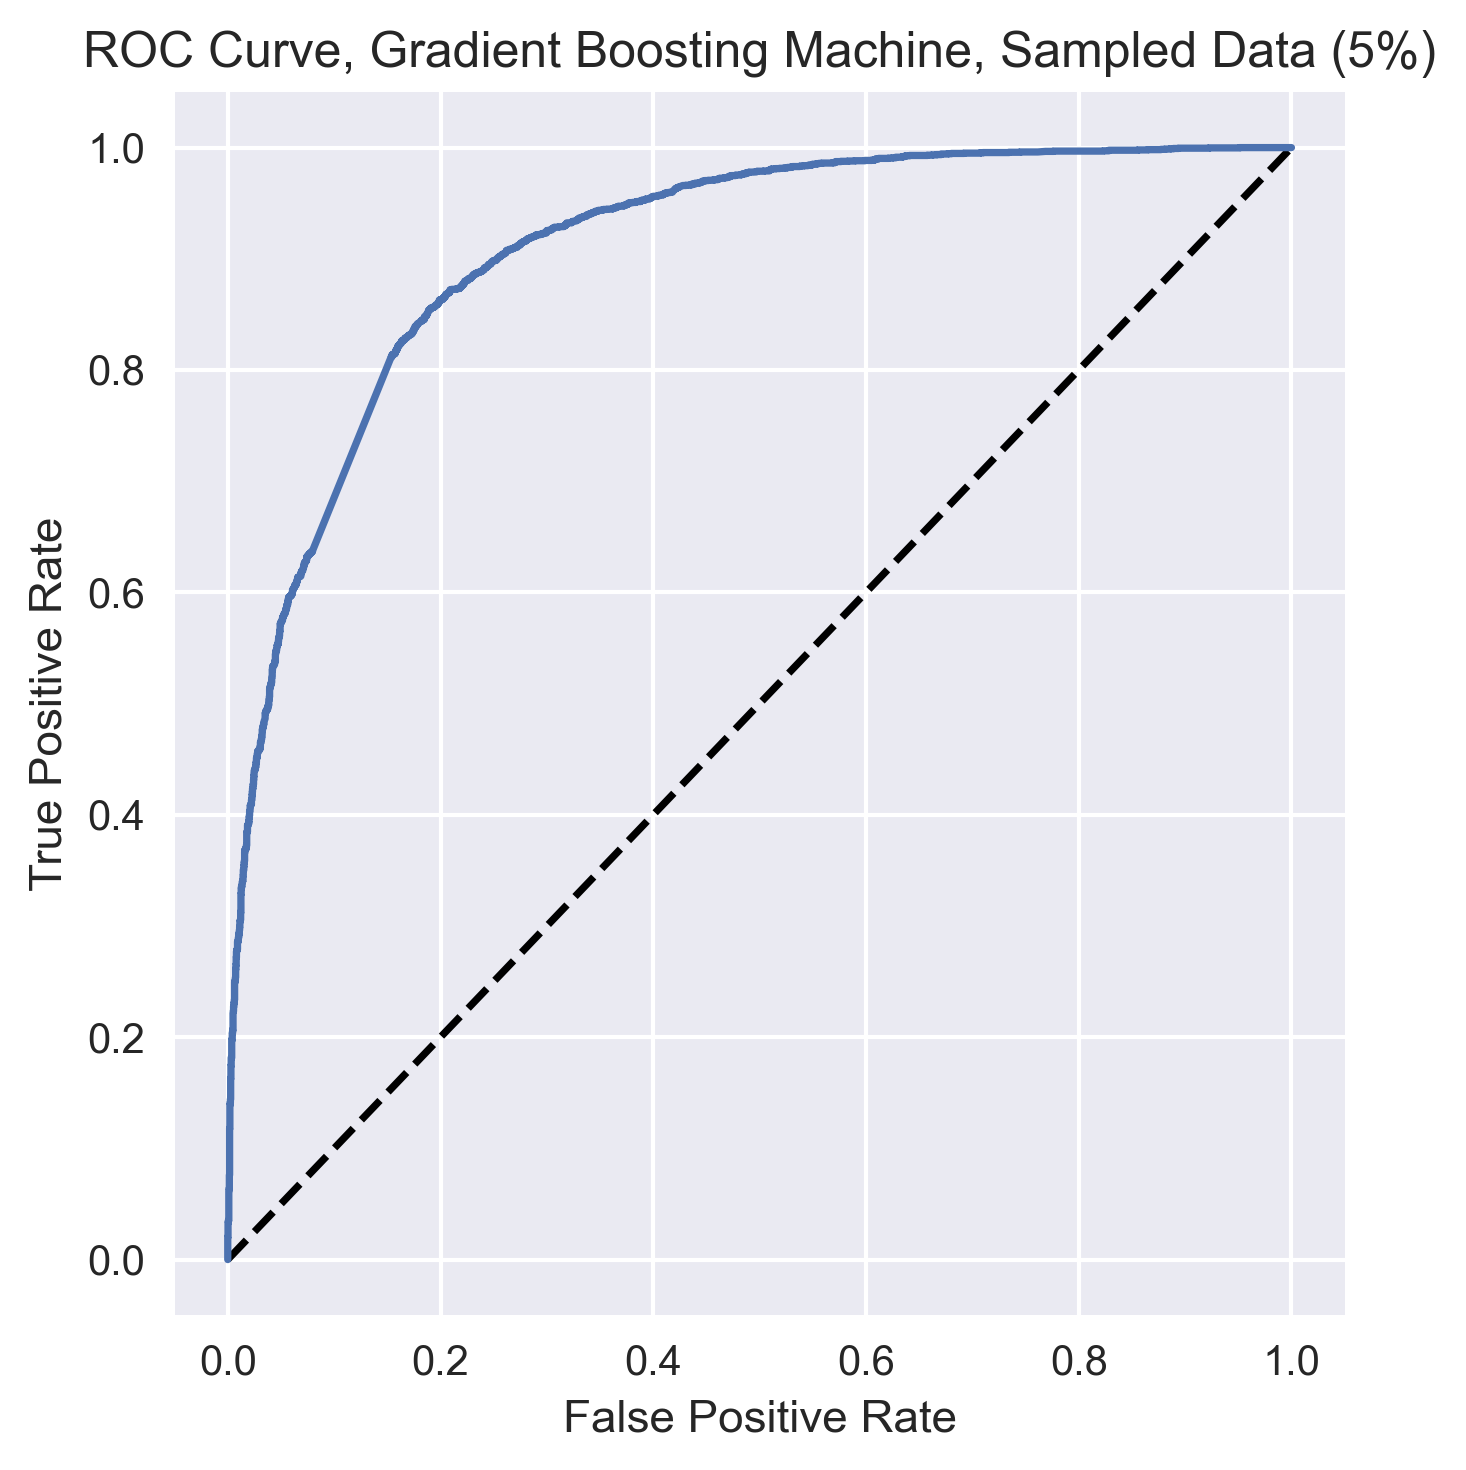

In [67]:
plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gboost, tpr_gboost)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, Gradient Boosting Machine, Sampled Data (5%)')
plt.show()
fig.savefig('../results/roc_curve_gradient_boosting_sample.png', dpi=fig.dpi)

### Multilayer Perceptron

In [87]:
# Setup a hyperparameter grid for multilayer perceptron
alpha = [0.0001, 0.01, 0.1]
param_grid = {'alpha': alpha}

In [88]:
mlp = MLPClassifier(hidden_layer_sizes = (100, 30), solver='lbfgs', max_iter=5000, verbose=1)

In [ ]:
mlp_cv = GridSearchCV(mlp, param_grid, cv=5, scoring='roc_auc')
mlp_cv.fit(X_train, y_train)

In [ ]:
best_param_mlp = mlp_cv.best_params_
validation_auc_mlp = mlp_cv.best_score_

# Predict on the test data
y_pred_prob = mlp_cv.predict_proba(X_test)[:, 1]
test_auc_mlp = roc_auc_score(y_test, y_pred_prob)
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_prob)

In [ ]:
mlp_cv.best_estimator_

In [ ]:
print('Tuned Multilayer Perceptron Parameters: {}'.format(best_param_mlp))
print('Tuned Multilayer Perceptron Validation AUC: {}'.format(validation_auc_mlp))
print('Tuned Multilayer Perceptron Test AUC: {}'.format(test_auc_mlp))

In [ ]:
plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_mlp, tpr_mlp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, Multilayer Perceptron, Sampled Data (5%)')
plt.show()
fig.savefig('../results/roc_curve_multilayer_perceptron_sample.png', dpi=fig.dpi)

----

### Multinomial Naive Bayes

In [72]:
# Setup a hyperparameter grid for multinomial Naive Bayes
alpha = np.logspace(-2, 1, 4)
param_grid = {'alpha': alpha}

In [73]:
multiNB = MultinomialNB()

In [74]:
multiNB_cv = GridSearchCV(multiNB, param_grid, cv=5, scoring='roc_auc')
multiNB_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': array([ 0.01,  0.1 ,  1.  , 10.  ])},
             scoring='roc_auc')

In [81]:
best_param_multiNB = multiNB_cv.best_params_
validation_auc_multiNB = multiNB_cv.best_score_

# Predict on the test data
y_pred_prob = multiNB_cv.predict_proba(X_test)[:, 1]
test_auc_multiNB = roc_auc_score(y_test, y_pred_prob)
fpr_multiNB, tpr_multiNB, thresholds_multiNB = roc_curve(y_test, y_pred_prob)

In [79]:
multiNB_cv.best_estimator_

MultinomialNB(alpha=0.1)

In [80]:
print('Tuned Multinomial Naive Bayes Parameters: {}'.format(best_param_multiNB))
print('Tuned Multinomial Naive Bayes Validation AUC: {}'.format(validation_auc_multiNB))
print('Tuned Multinomial Naive Bayes Test AUC: {}'.format(test_auc_multiNB))

Tuned Multinomial Naive Bayes Parameters: {'alpha': 0.1}
Tuned Multinomial Naive Bayes Validation AUC: 0.9330643976643884
Tuned Multinomial Naive Bayes Test AUC: 0.9354351876519651


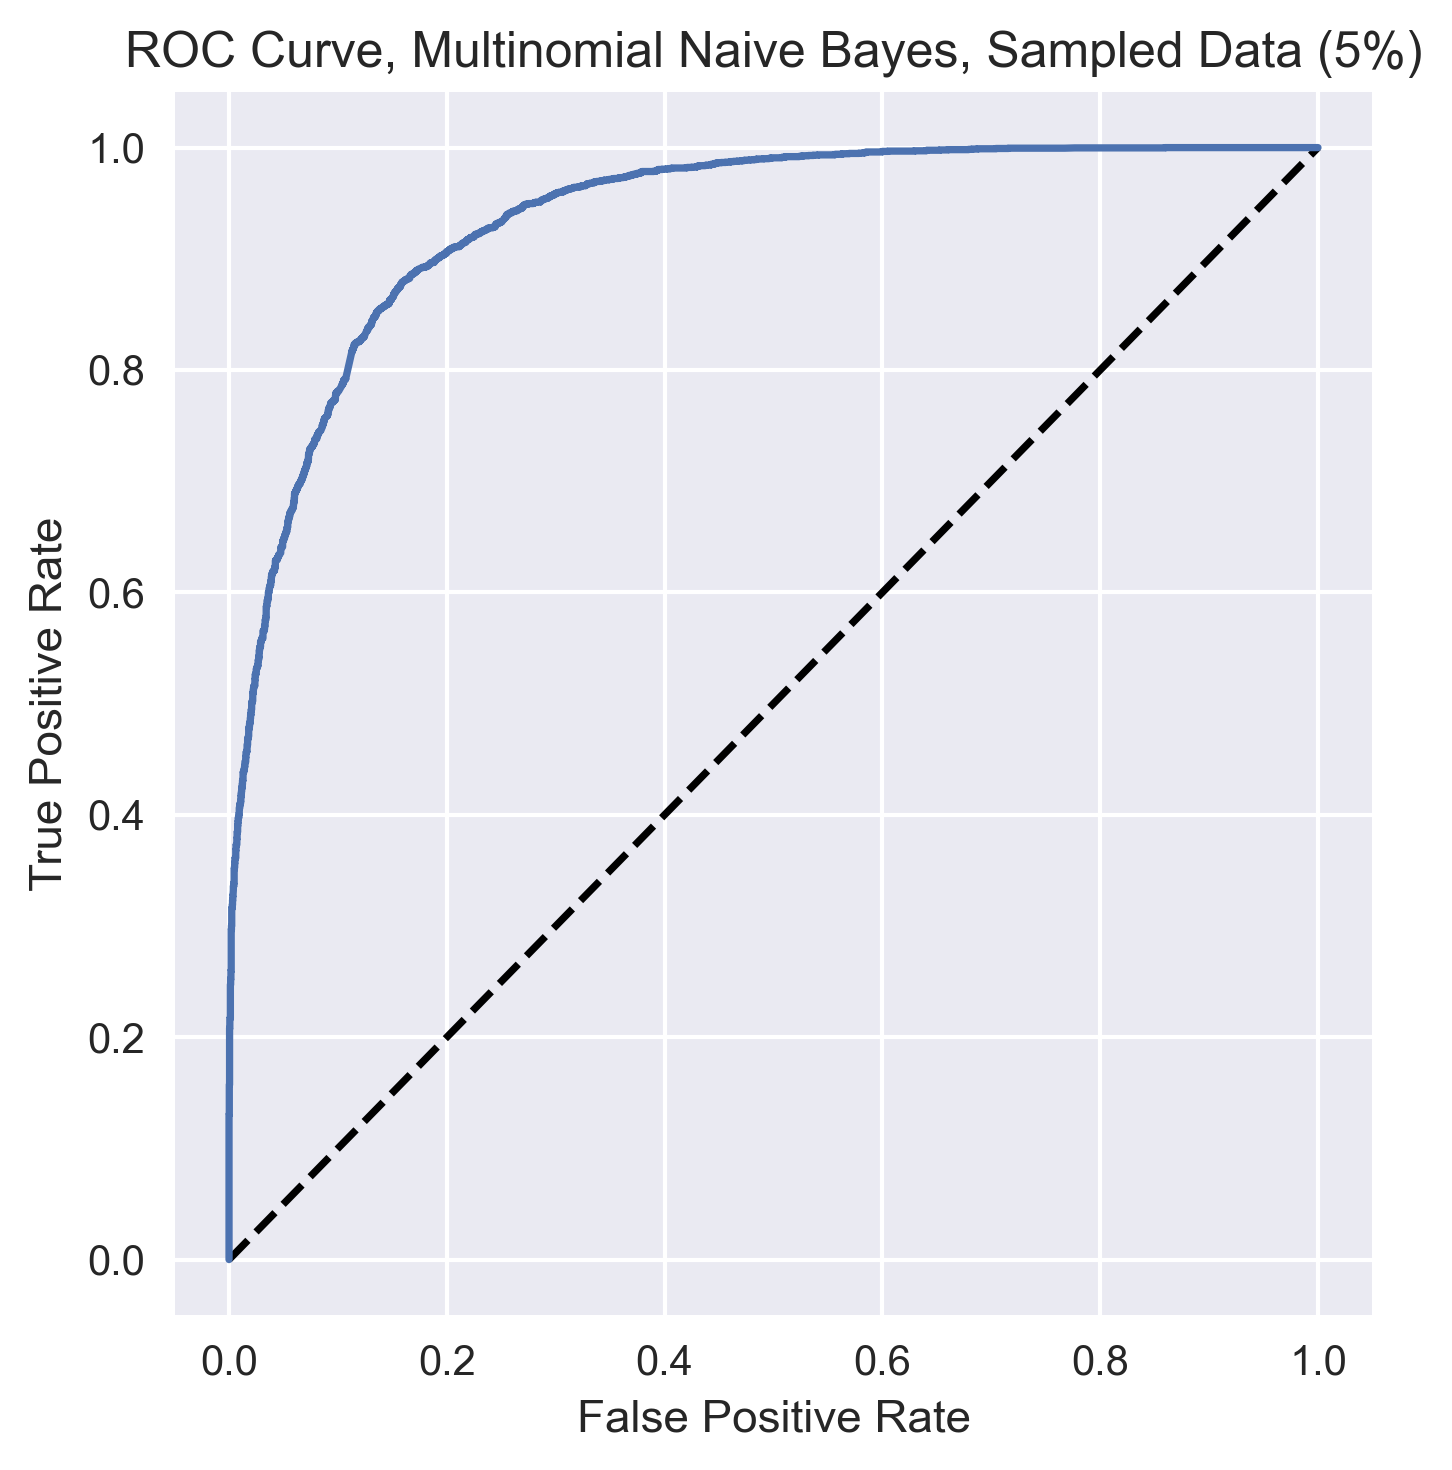

In [82]:
plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_multiNB, tpr_multiNB)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, Multinomial Naive Bayes, Sampled Data (5%)')
plt.show()
fig.savefig('../results/roc_curve_multinomial_NB_sample.png', dpi=fig.dpi)

----

### Comparion on ROC Curves

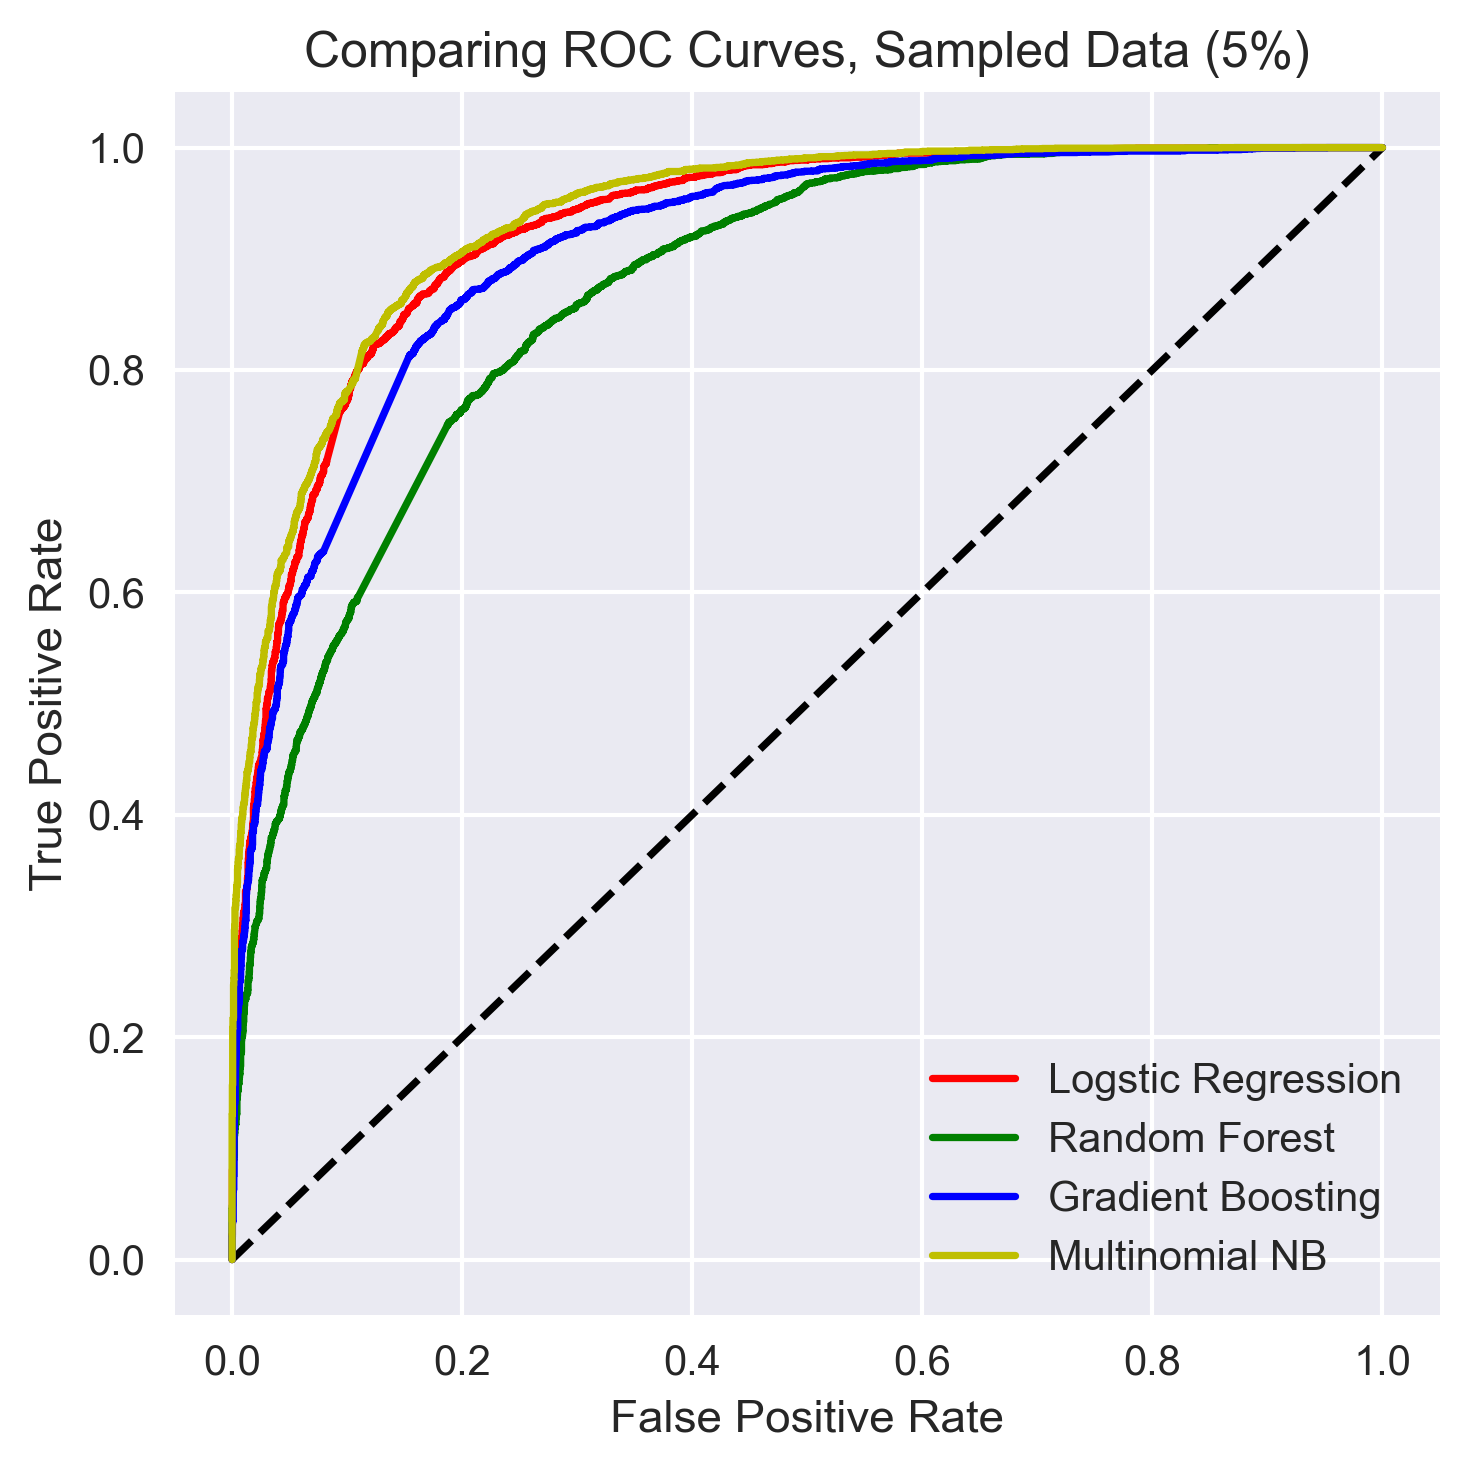

In [83]:
plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logreg, tpr_logreg, 'r-', label='Logstic Regression')
plt.plot(fpr_rf, tpr_rf, 'g-', label='Random Forest')
plt.plot(fpr_gboost, tpr_gboost, 'b-', label='Gradient Boosting')
plt.plot(fpr_multiNB, tpr_multiNB, 'y-', label='Multinomial NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparing ROC Curves, Sampled Data (5%)')
plt.legend()
plt.show()
fig.savefig('../results/roc_curves.png', dpi=fig.dpi)